
<font color='red' size='5'> Exercise 1:Implement K-Nearest Neighbor (KNN) (Zoo Dataset)</font>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
csv_filename="zoo.data"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, 
              names=["Animal", "Hair" , "Feathers" , "Eggs" , "Milk" , "Airborne",
                     "Aquatic" , "Predator" , "Toothed" , "Backbone", "Breathes" , "Venomous",
                     "Fins", "Legs", "Tail", "Domestic", "Catsize", "Type" ])

In [2]:
df

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.head(10)

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
df.tail(10)

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
92,tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
93,vampire,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
94,vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


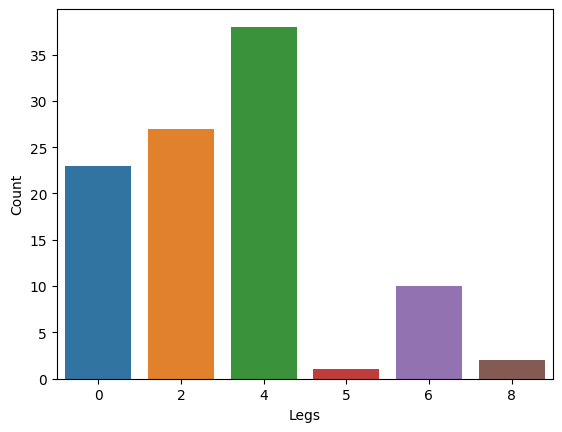

Legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64

In [5]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(x="Legs", data=df)
plt.xlabel("Legs")
plt.ylabel("Count")
plt.show()
df.loc[:,'Legs'].value_counts()



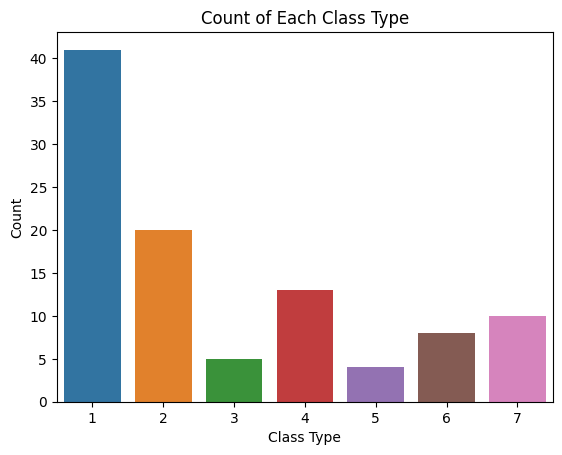

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Type', data=df)
plt.title("Count of Each Class Type")
plt.xlabel("Class Type")
plt.ylabel("Count")
plt.show()

In [7]:
df= df.drop('Animal',axis=1)

In [8]:
df.head()

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Type',axis=1)
Y= df['Type']

In [12]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: Type, Length: 101, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [15]:
len(X_train)

70

In [16]:
len(X_test)

31

In [17]:
X_train

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
80,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
11,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
59,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0


In [18]:
X_test

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
63,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0,1
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0
34,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0


In [19]:
y_train

80    3
5     1
11    2
72    7
59    2
     ..
92    4
28    1
2     4
83    2
78    2
Name: Type, Length: 70, dtype: int64

In [20]:
y_test

54    1
63    1
67    1
15    7
88    6
34    4
1     1
60    4
48    1
16    2
35    1
71    2
25    5
38    4
3     1
40    6
30    6
39    6
73    4
17    1
10    1
52    5
53    7
86    4
51    6
93    1
61    4
32    1
77    7
69    1
65    1
Name: Type, dtype: int64

In [21]:
from sklearn.neighbors import KNeighborsClassifier 
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [22]:
knn.score(X_test,y_test)

0.9354838709677419


<font color='red' size='5'> Confusion Matrix</font>

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  1,  0,  0,  0,  2]], dtype=int64)


<font color='red' size='5'> Exercise 2: Determination of Optimal Value of K in KNN algorithm</font>

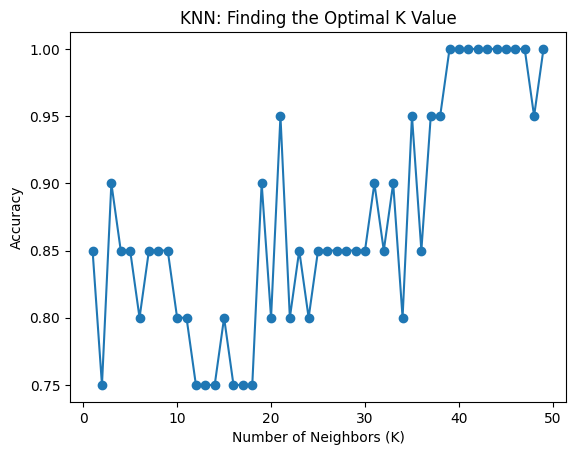

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Generate a sample dataset for demonstration
np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # A simple classification task

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Range of K values to test
k_value = range(1, 50)
scores = []

# Iterate over different K values and evaluate the model
for k in k_value:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot the results to find the optimal K value
plt.figure()
plt.plot(k_value, scores, marker='o')
plt.title('KNN: Finding the Optimal K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()


In [26]:
from sklearn.neighbors import KNeighborsClassifier 
knn= KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=42)

In [37]:
knn.score(X_test,y_test)

1.0


<font color='red' size='5'>Exercise 3: Compare KNN algorithm with other Variants of Nearest Neighbor Learning 
</font>

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Train and weighted evaluate KNN
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

# Train and evaluate Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

# Train and evaluate Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

# Present the comparison
print("Method            Accuracy   F1-Score")
print(f"KNN (n_neighbors=42)    {knn_accuracy:.2f}      {knn_f1:.2f}")
print(f"Decision Trees          {dt_accuracy:.2f}      {dt_f1:.2f}")
print(f"SVM                    {svm_accuracy:.2f}      {svm_f1:.2f}")


Method            Accuracy   F1-Score
KNN (n_neighbors=42)    1.00      1.00
Decision Trees          0.80      0.80
SVM                    0.90      0.90
